In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

## Load rating data

In [2]:
rating_data = pd.read_csv('../data/ratings.dat.txt', sep="::",
                          names=['user_id', 'movie_id', 'rating', 'rating_timestamp'],
                          engine='python')
rating_data

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524
...,...,...,...,...
915365,71257,9893250,10,1613857551
915366,71257,9898858,3,1585958452
915367,71258,172495,10,1587107015
915368,71258,414387,10,1587107852


In [3]:
rating_data['rating_timestamp'] = pd.to_datetime(rating_data['rating_timestamp'], unit='s')
rating_data

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,2013-10-05 21:00:50
1,2,499549,9,2013-08-17 15:26:38
2,2,1305591,8,2013-08-17 12:28:27
3,2,1428538,1,2013-06-15 14:38:09
4,3,75314,1,2020-07-23 01:42:04
...,...,...,...,...
915365,71257,9893250,10,2021-02-20 21:45:51
915366,71257,9898858,3,2020-04-04 00:00:52
915367,71258,172495,10,2020-04-17 07:03:35
915368,71258,414387,10,2020-04-17 07:17:32


## How many users and movies are mentioned in the dataset?

In [51]:
by_year = rating_data.groupby(by=rating_data['rating_timestamp'].dt.year)[['user_id', 'movie_id']].count()
by_year

,user_id,movie_id
rating_timestamp,,
2013,170807,170807
2014,156354,156354
2015,123644,123644
2016,112455,112455
2017,105987,105987
2018,81870,81870
2019,74183,74183
2020,63126,63126
2021,26944,26944


In [4]:
print(f"unique users : {rating_data['user_id'].nunique()}")

unique users : 71259


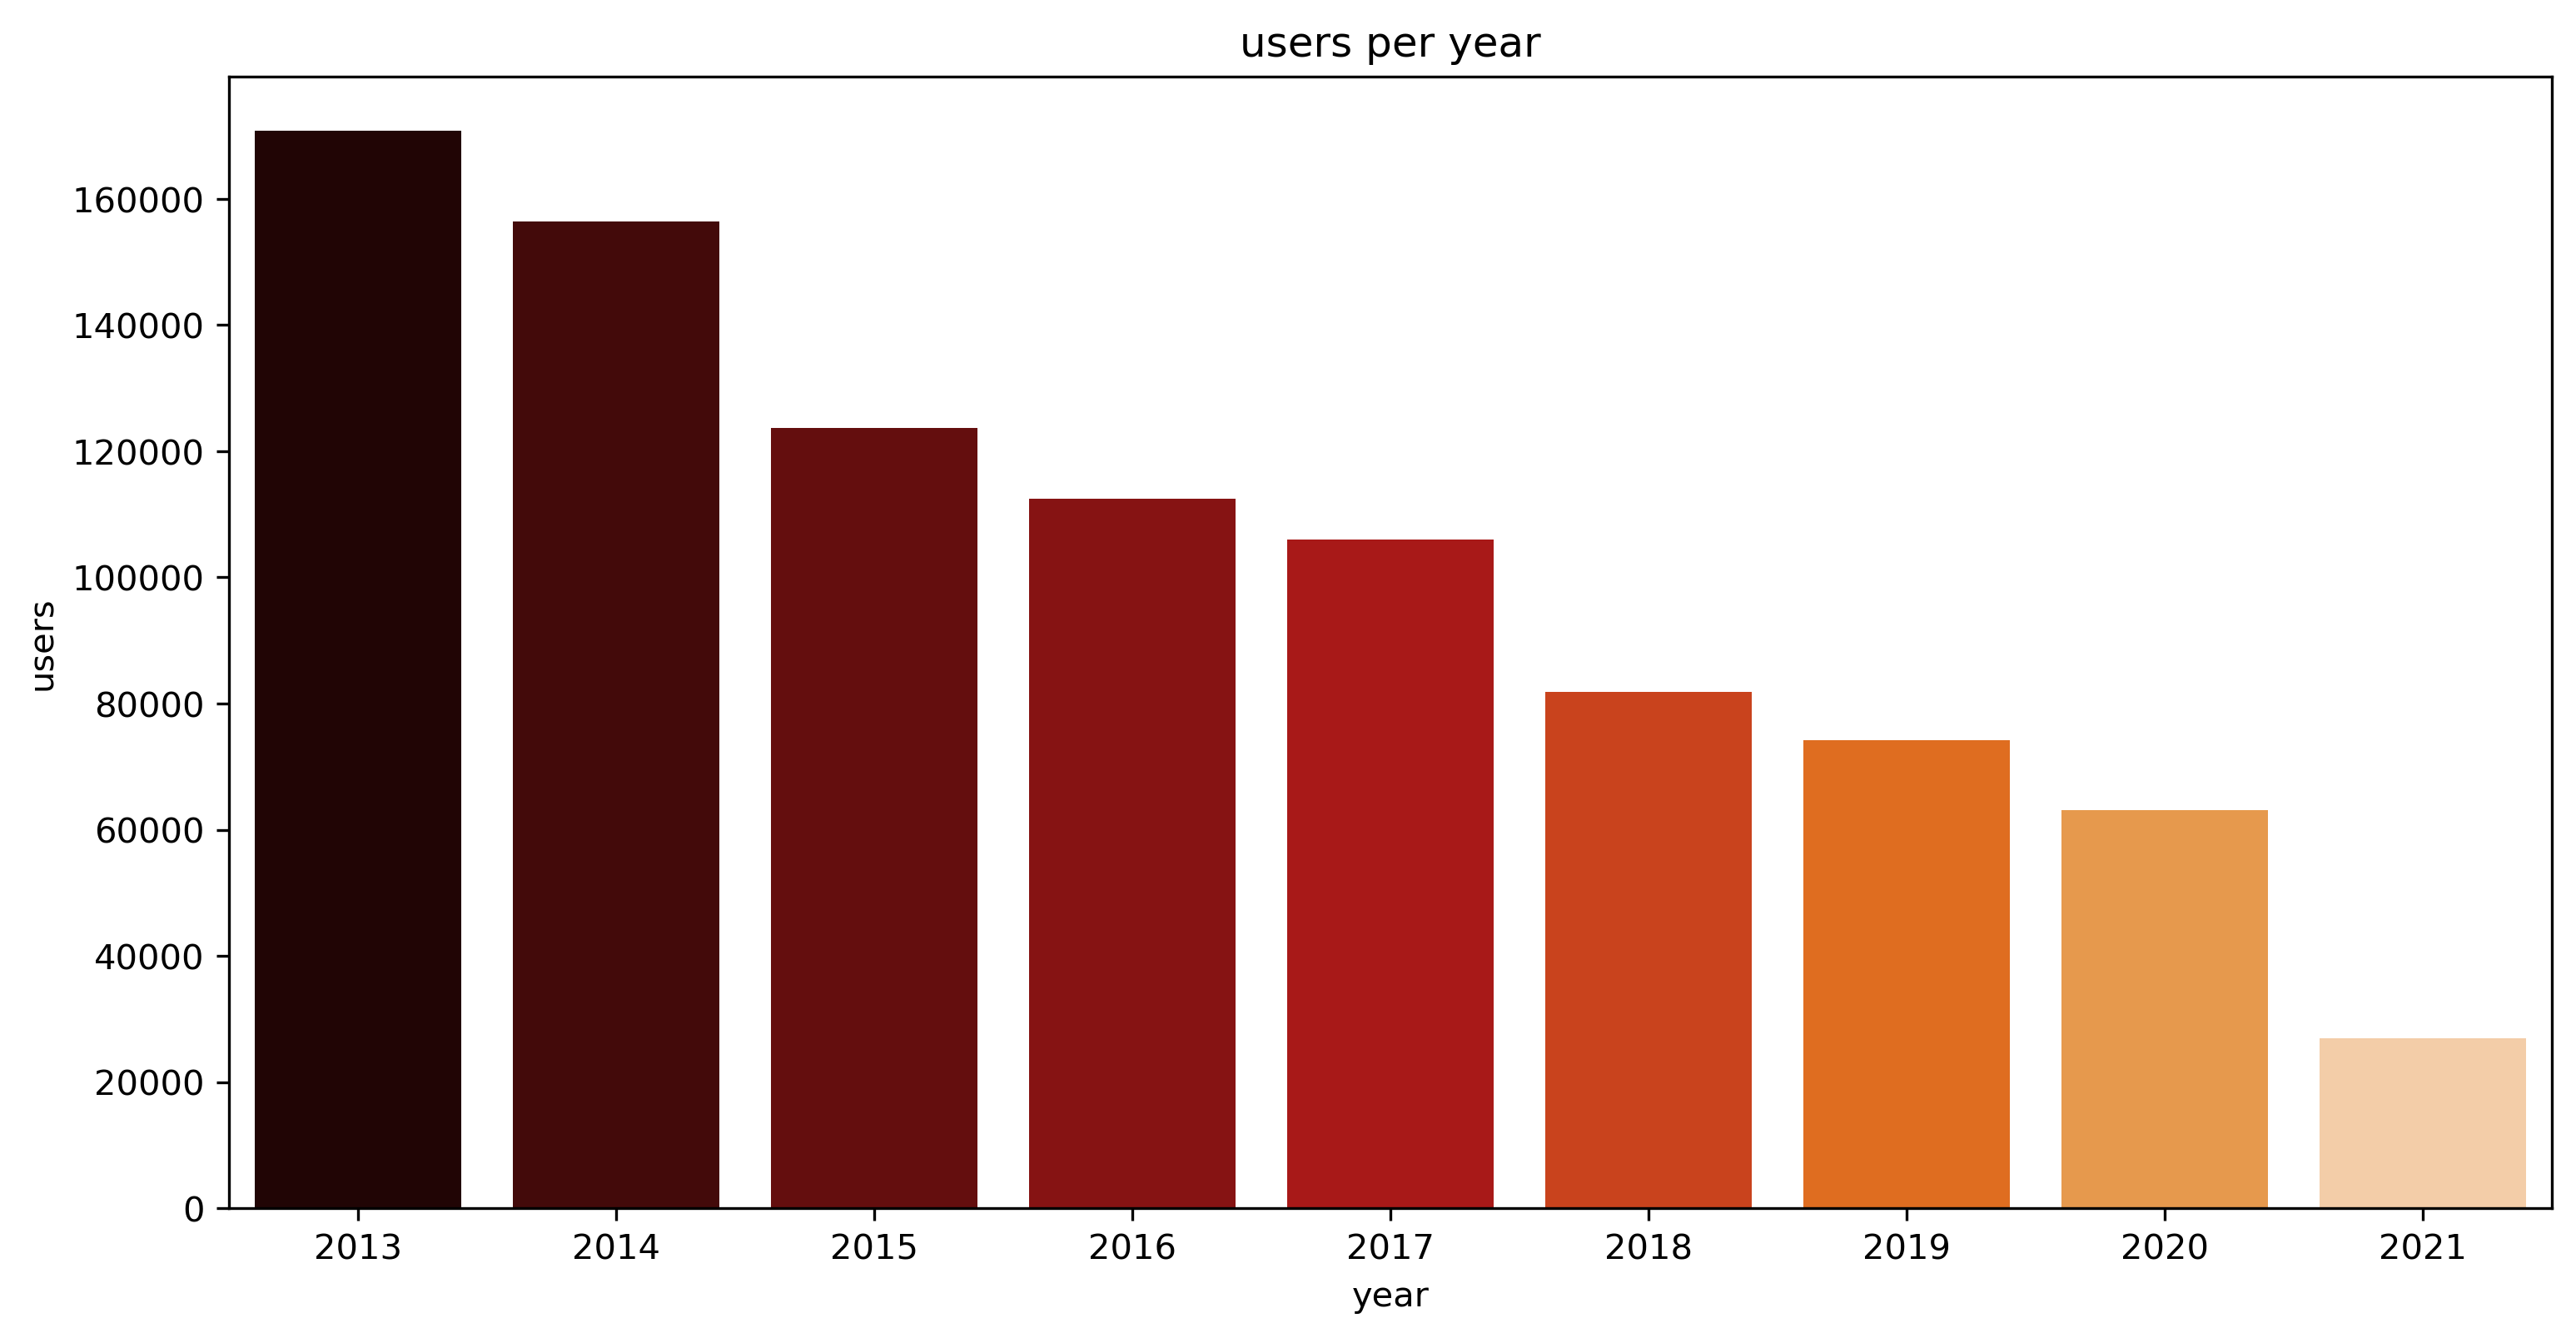

In [53]:
plt.figure(figsize=[12, 6], dpi=300)
sns.barplot(x=by_year.index,
            y=by_year['user_id'],
            palette='gist_heat')
plt.xlabel('year')
plt.ylabel('users')
plt.title('users per year')
plt.show()

In [5]:
print(f"unique movies : {rating_data['movie_id'].nunique()}")

unique movies : 37704


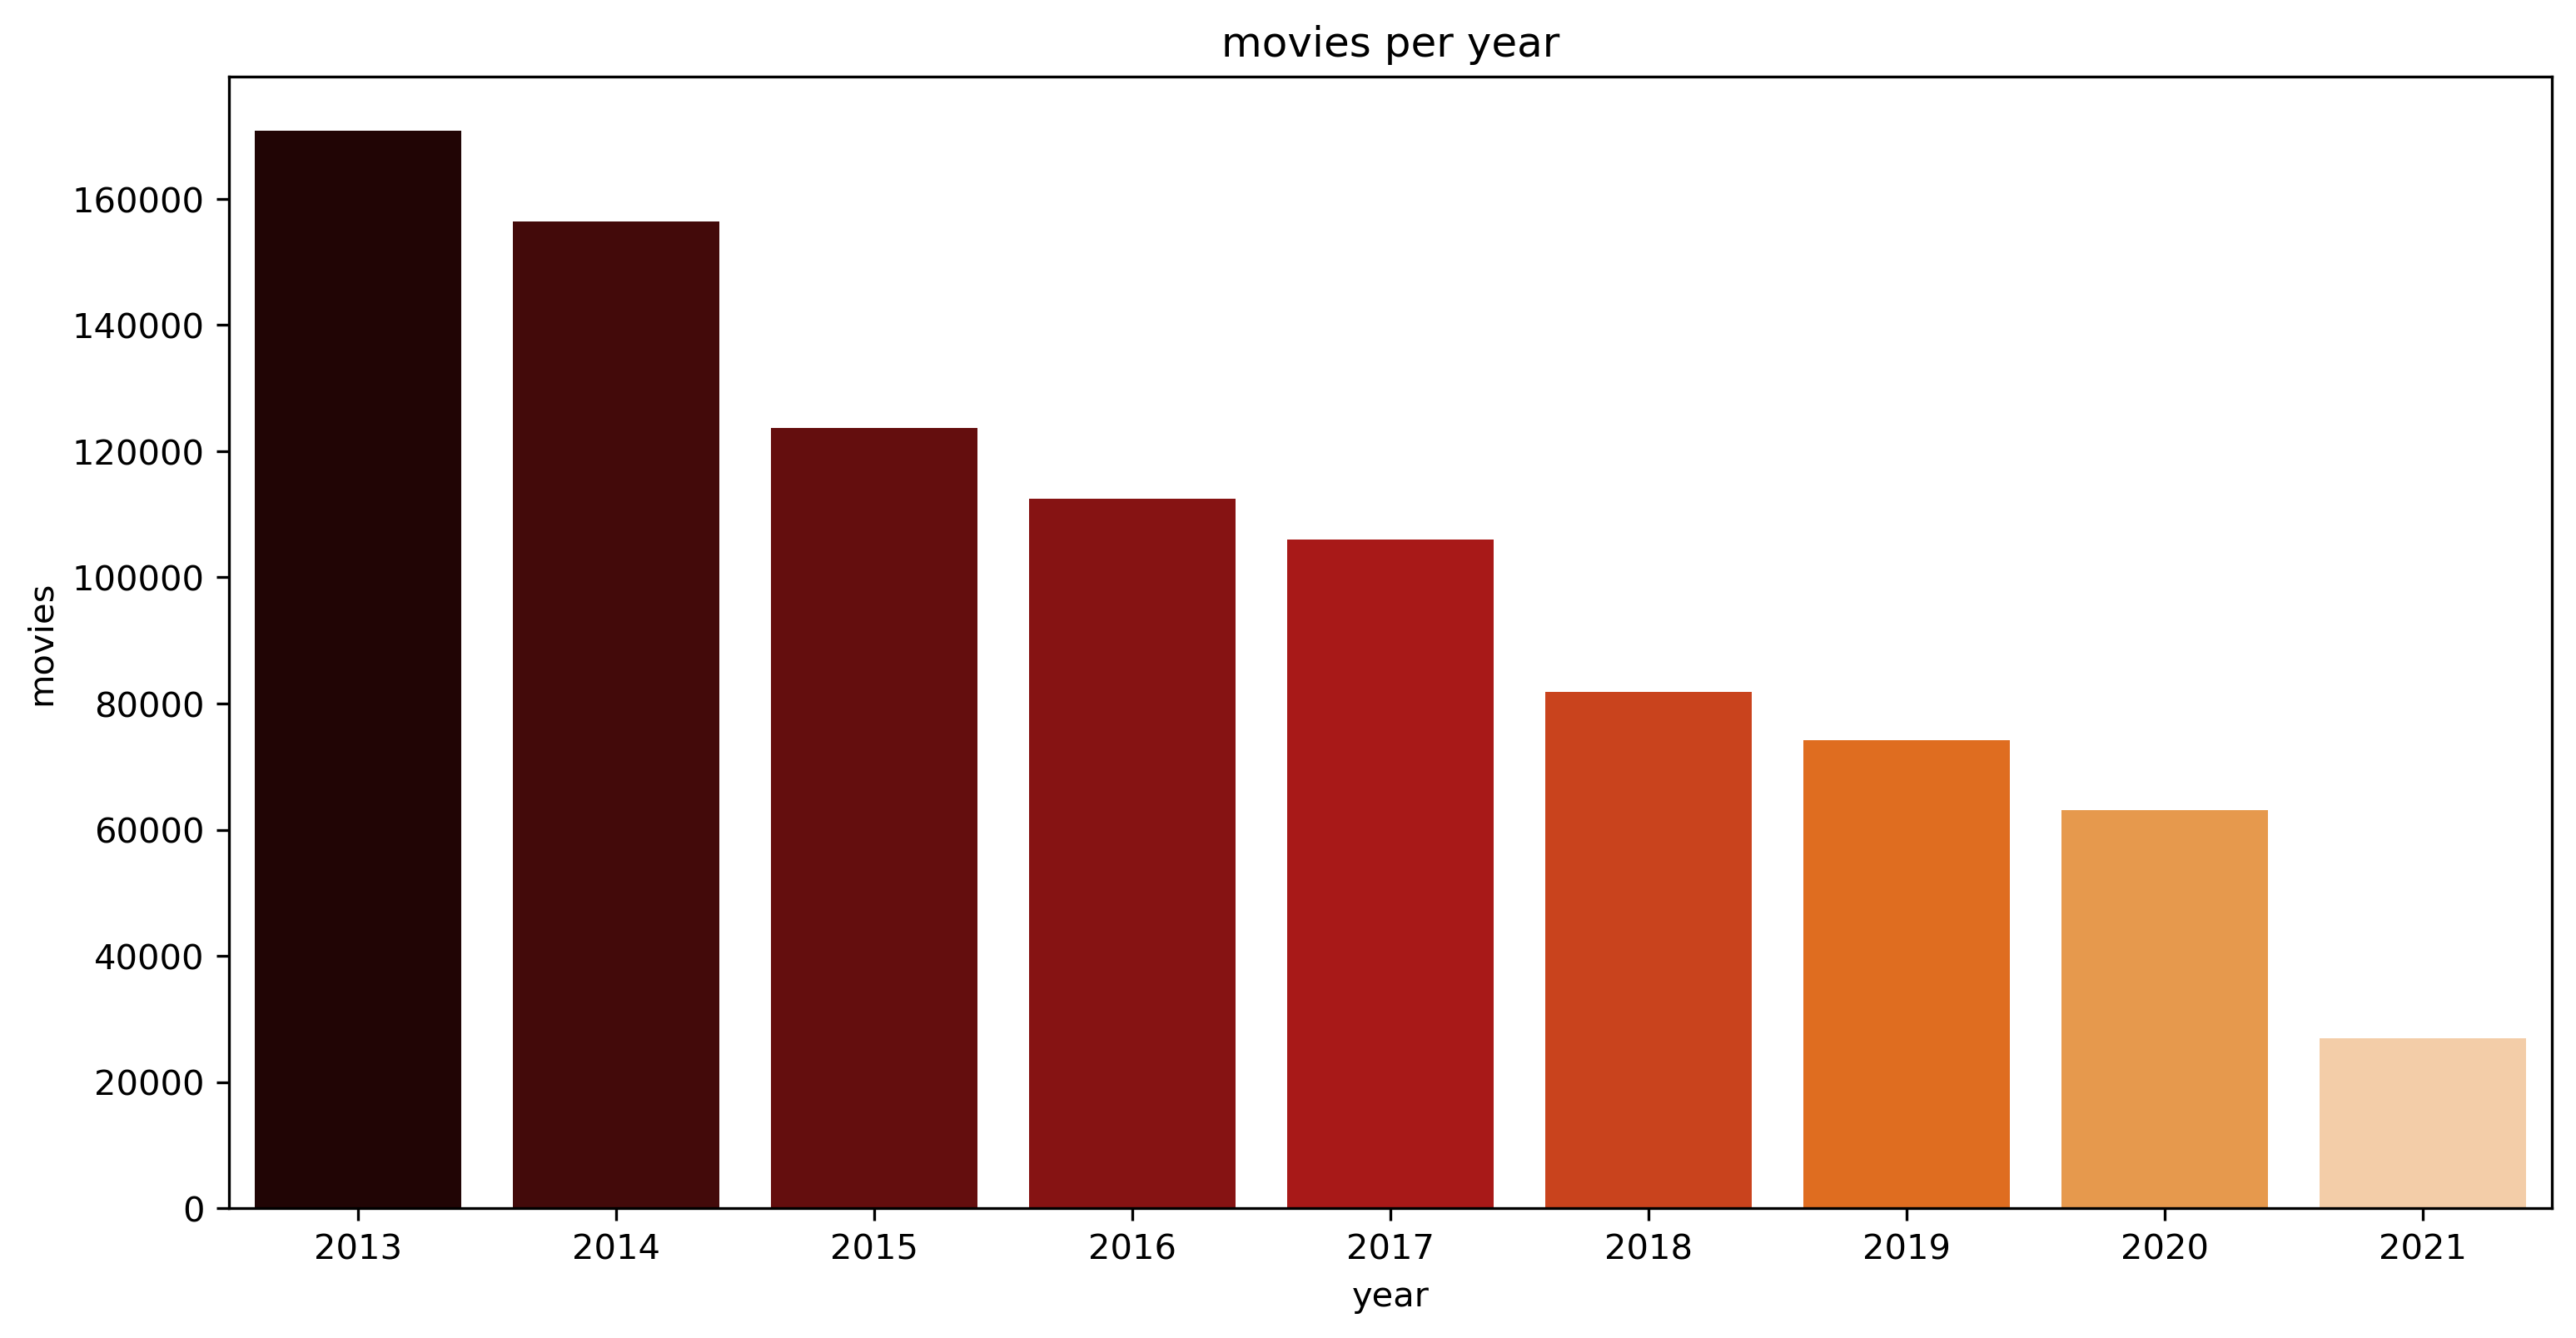

In [54]:
plt.figure(figsize=[12, 6], dpi=300)
sns.barplot(x=by_year.index,
            y=by_year['movie_id'],
            palette='gist_heat')
plt.xlabel('year')
plt.ylabel('movies')
plt.title('movies per year')
plt.show()

## How old are the data points (number of datapoints pr year)

In [6]:
oldest = rating_data['rating_timestamp'].min()
newest = rating_data['rating_timestamp'].max()
per_year = rating_data['rating_timestamp'].dt.year.value_counts()

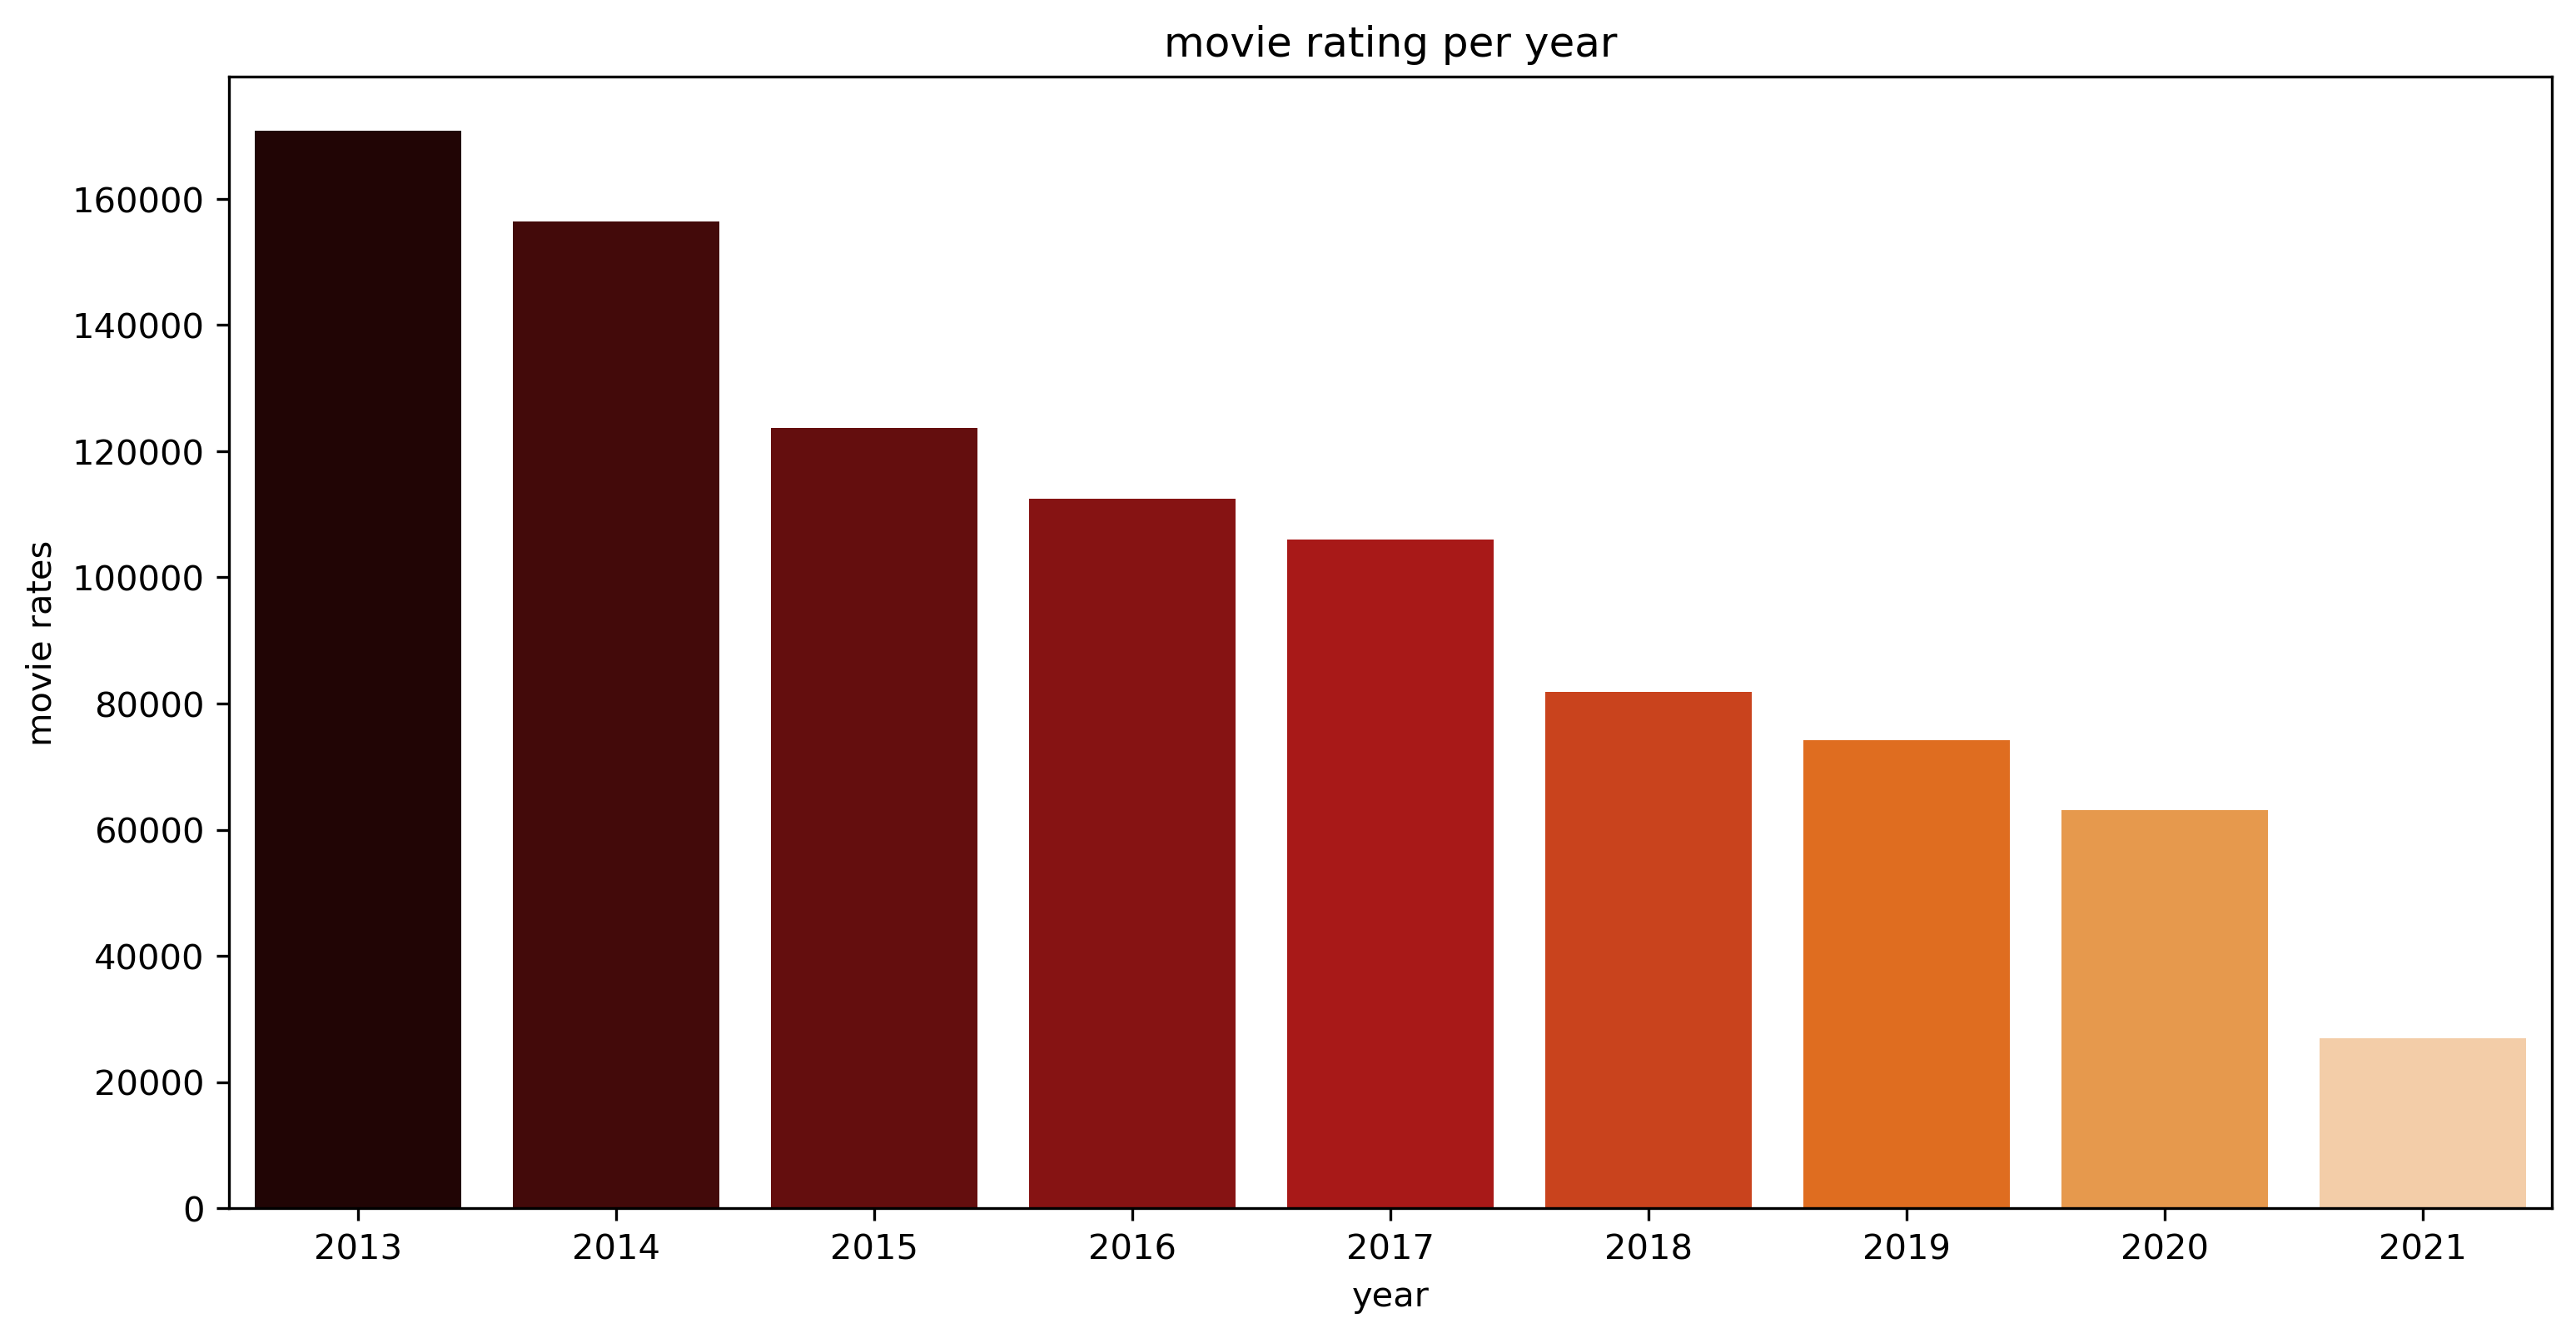

In [7]:
plt.figure(figsize=[12, 6], dpi=300)
sns.barplot(x=per_year.index,
            y=per_year.values,
            palette='gist_heat')
plt.xlabel('year')
plt.ylabel('movie rates')
plt.title('movie rating per year')
plt.show()

In [8]:
print(f"oldest rating date: {oldest}\n"
      f"latest rating date: {newest}")
print('-' * 80)
print('rating count per year:\n')

for index, value in per_year.iteritems():
    print(f'{index} -> {value}')

print('')
print(f"highest ratings done in a year {np.max(per_year)}. "
      f"most of data points are in between 2013 and 2016 "
      f"({np.round(np.sum(per_year.loc[2013:2016]) * 100 / rating_data.shape[0], 2)}%).")

oldest rating date: 2013-02-28 14:38:27
latest rating date: 2021-08-16 03:08:03
--------------------------------------------------------------------------------
rating count per year:

2013 -> 170807
2014 -> 156354
2015 -> 123644
2016 -> 112455
2017 -> 105987
2018 -> 81870
2019 -> 74183
2020 -> 63126
2021 -> 26944

highest ratings done in a year 170807. most of data points are in between 2013 and 2016 (61.53%).


## How popular are popular movies - Looking at the data when will you say a movie is popular?

In [57]:
rating_by_movie = rating_data.groupby(by='movie_id')[['user_id']].count().sort_values(by='user_id', ascending=False)
rating_by_movie

,user_id
movie_id,
1454468,3104
816692,2960
8579674,2889
993846,2840
7286456,2755
...,...
1087841,1
1087474,1
1087453,1


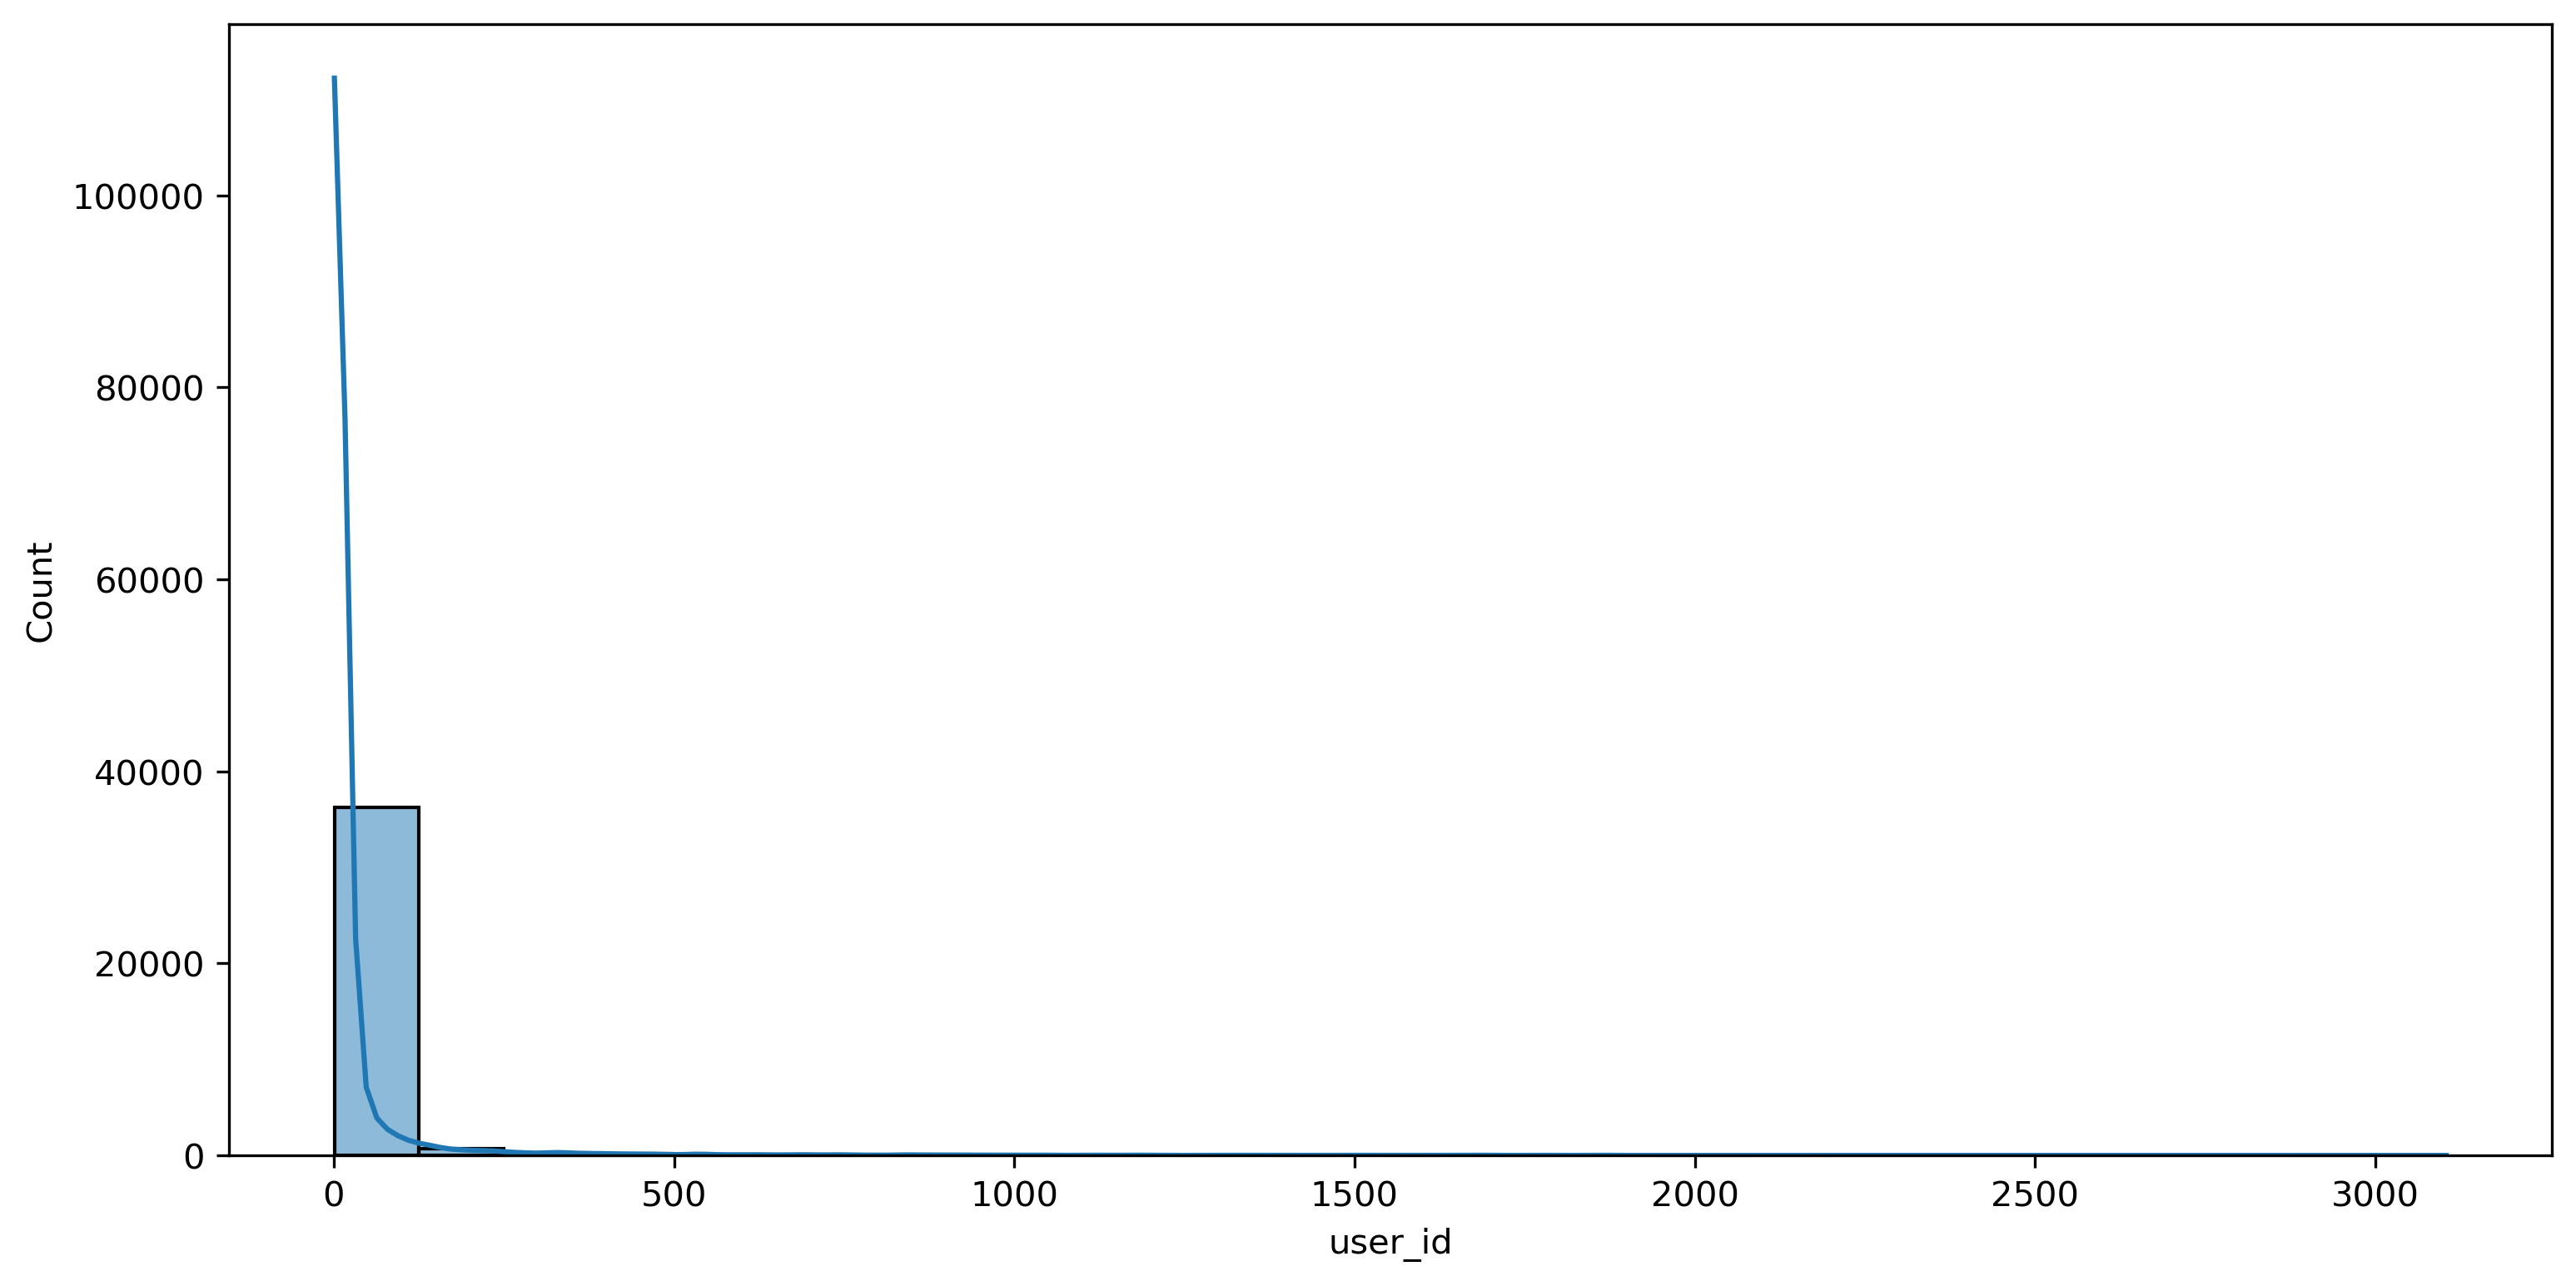

In [61]:
plt.figure(figsize=[12, 6], dpi=300)
sns.histplot(x=rating_by_movie['user_id'], kde=True, bins=25)
plt.show()

In [67]:
print(
    f"movies has rating less than 100 : {rating_by_movie[rating_by_movie['user_id'] < 10].shape[0]}\n"
    f"movies has rating more than 100 : {rating_by_movie[rating_by_movie['user_id'] > 10].shape[0]}")

movies has rating less than 100 : 29499
movies has rating more than 100 : 7791


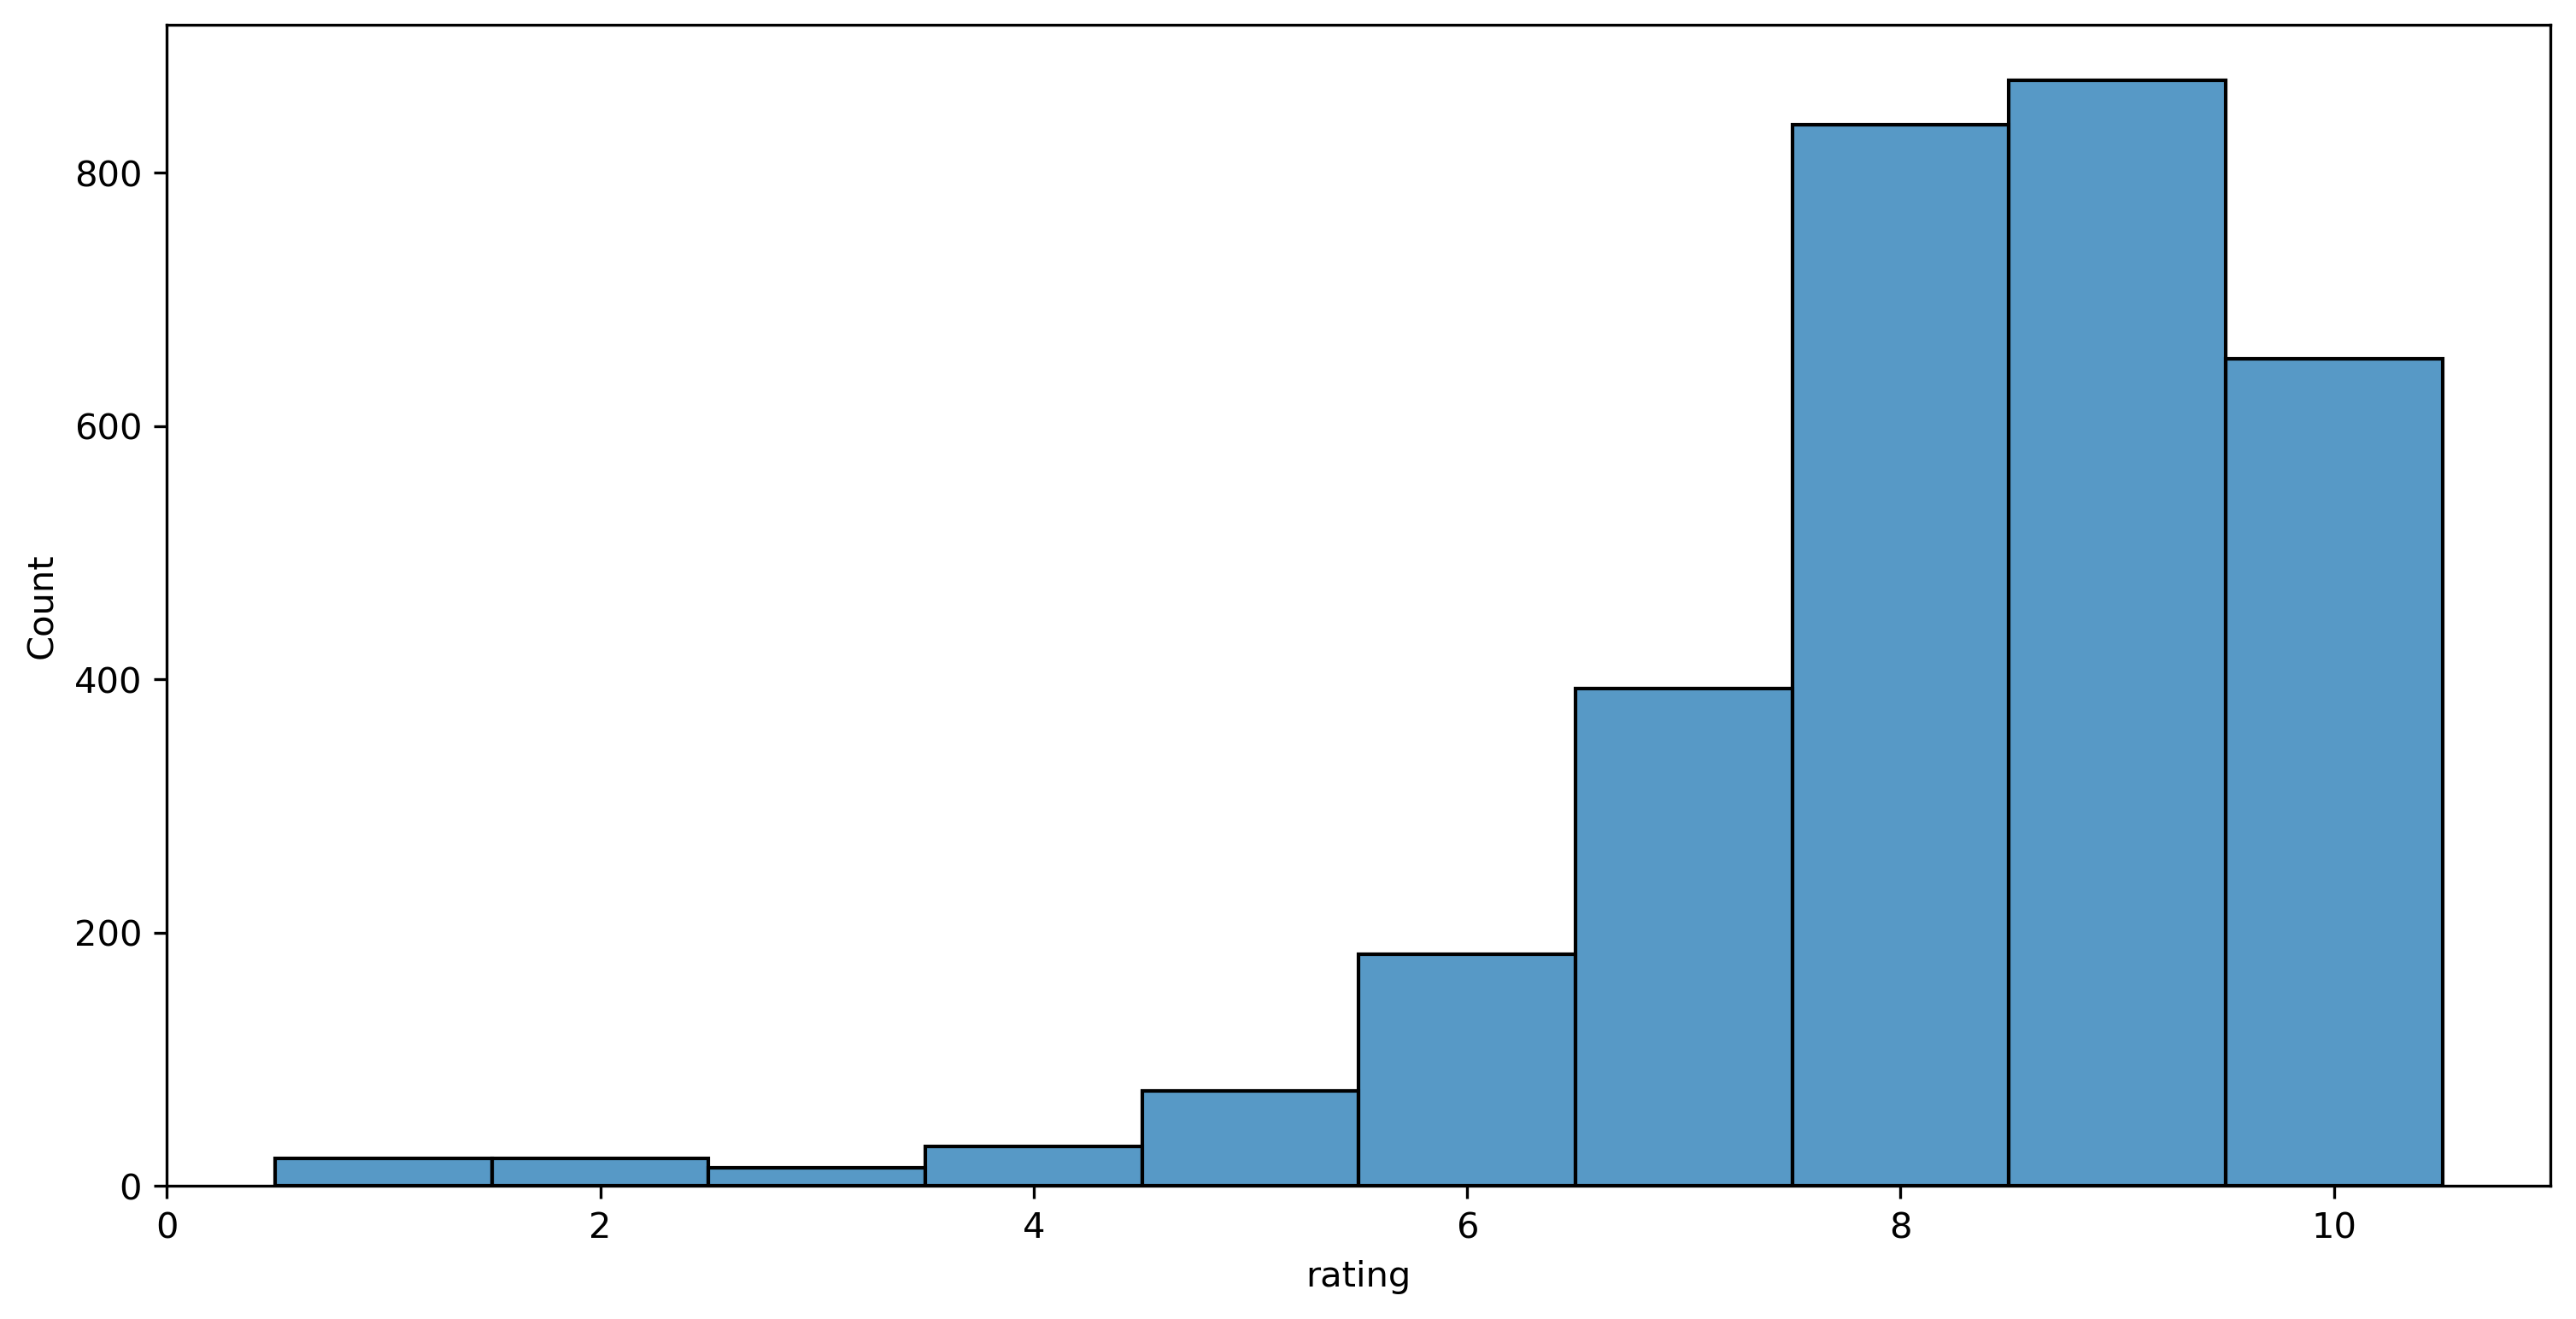

In [71]:
plt.figure(figsize=[12, 6], dpi=300)
sns.histplot(x='rating',
             data=rating_data[rating_data['movie_id'] == 1454468],
             discrete=True)
plt.xlabel('rating')
plt.show()

## How many long-tail movies are there?

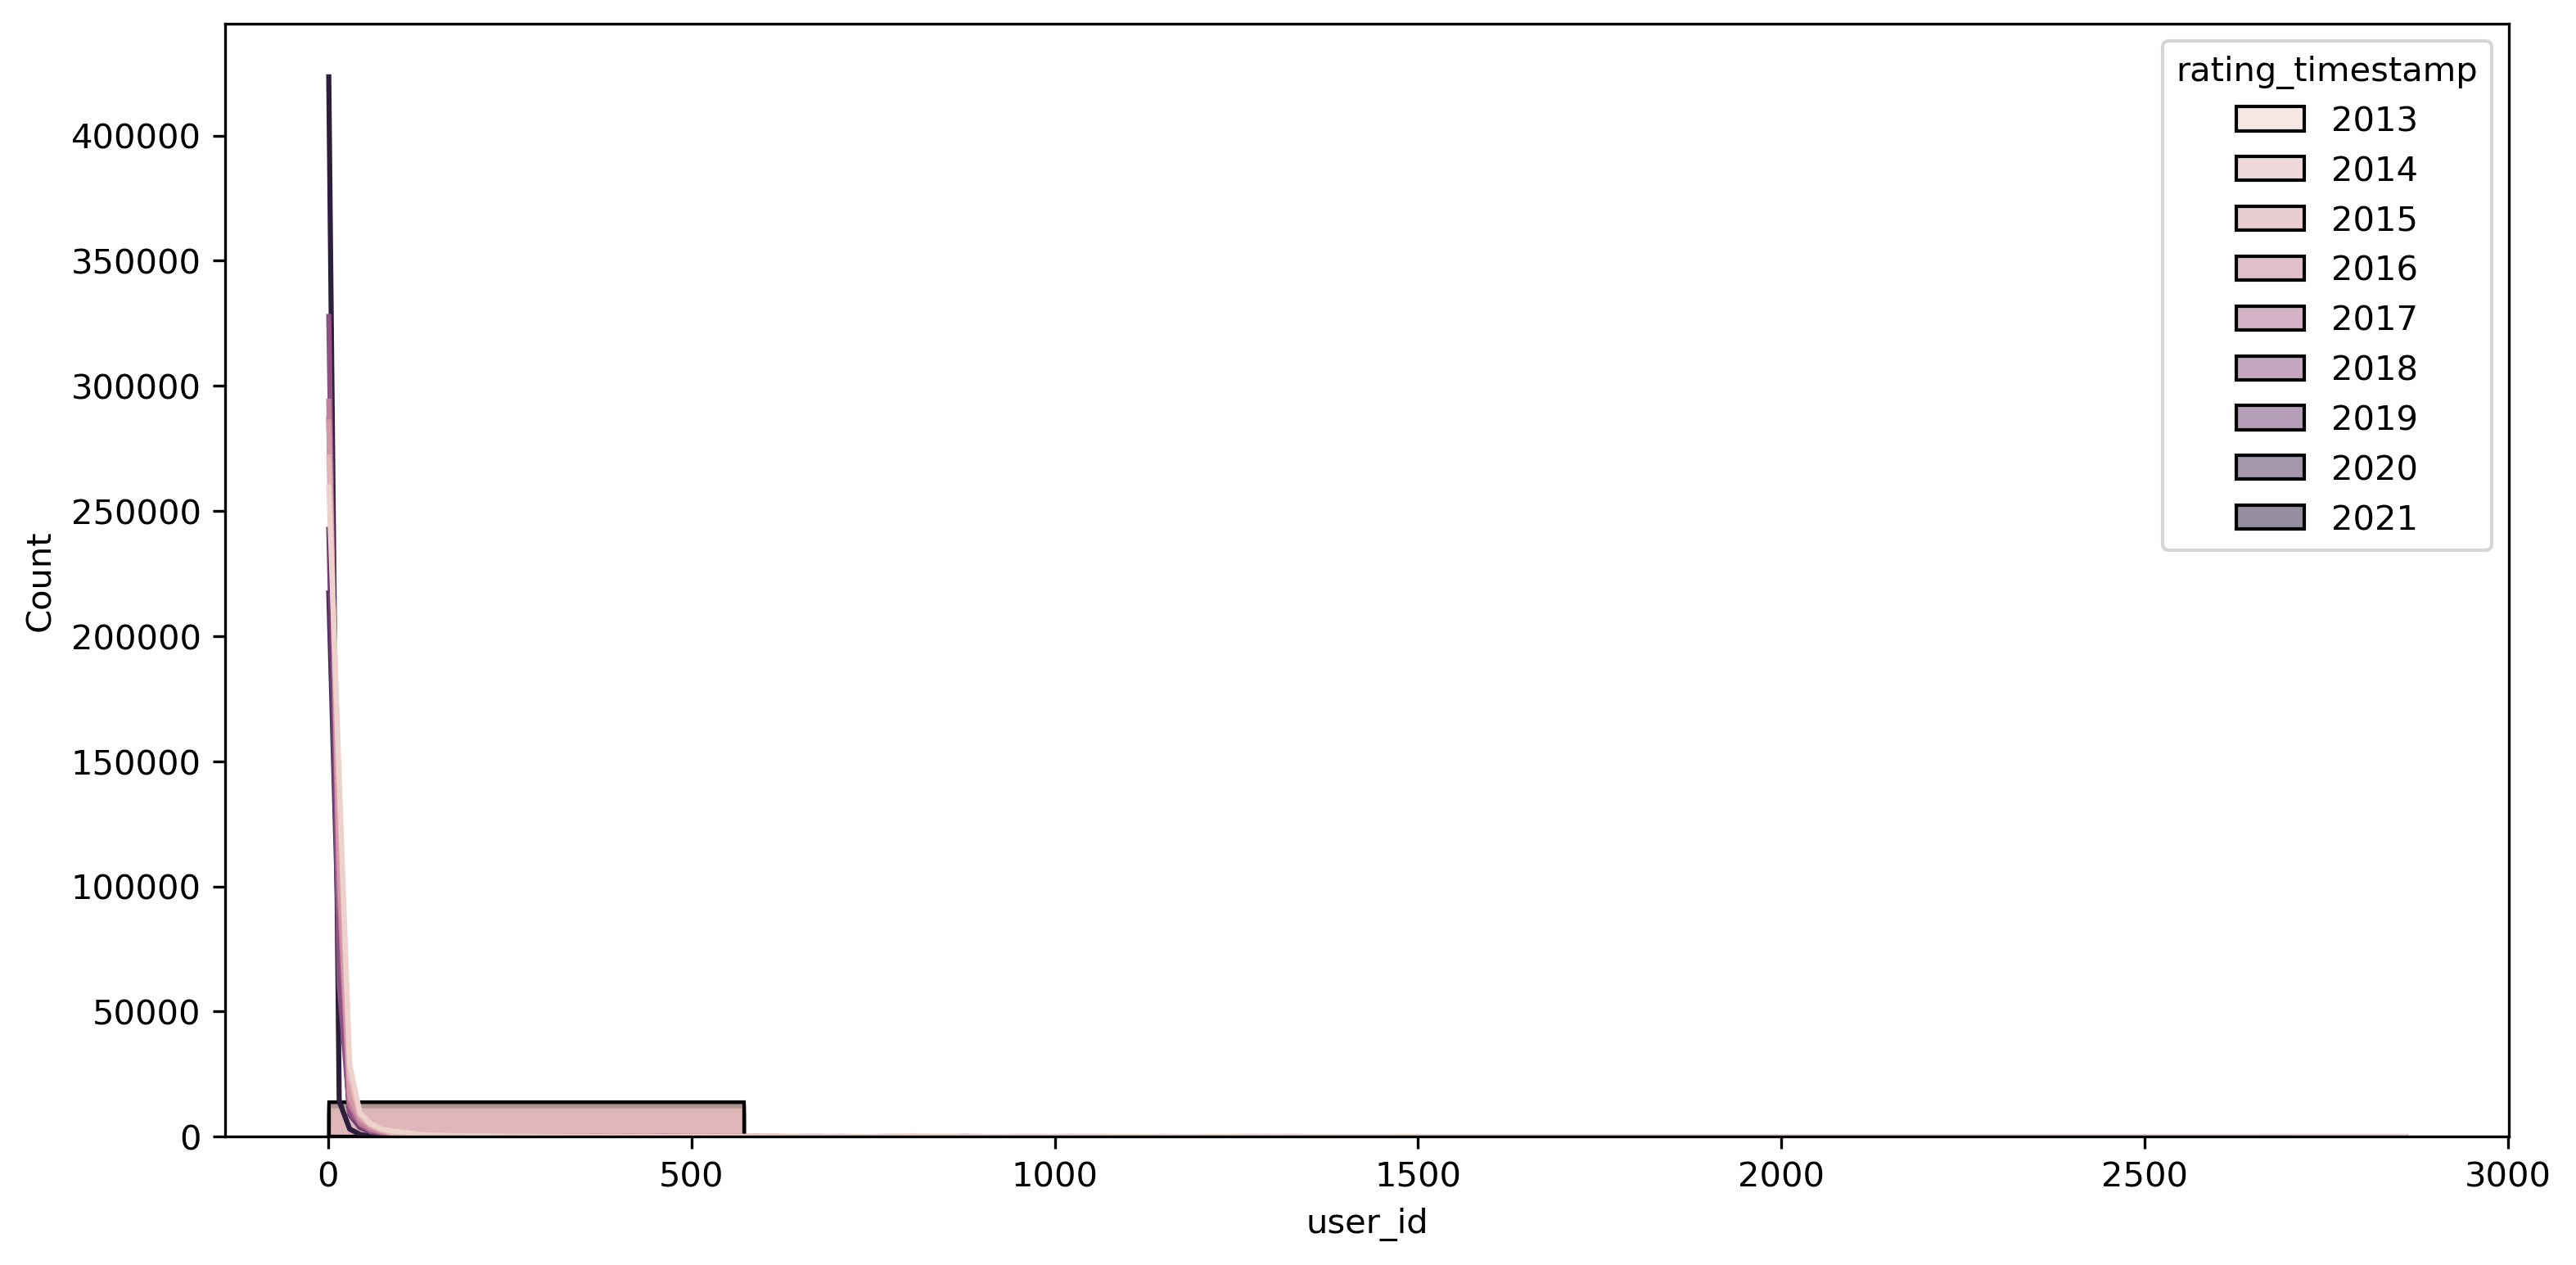

In [91]:
plt.figure(figsize=[12, 6], dpi=300)
sns.histplot(x='user_id',
             data=rating_data.groupby(by=[rating_data['rating_timestamp'].dt.year,
                                          'movie_id'])[['user_id']].count().reset_index(),
             kde=True, bins=5, hue='rating_timestamp')
plt.show()

In [88]:
print(f"count of long tail movies: {rating_by_movie[rating_by_movie['user_id'] < 2].shape[0]}")

count of long tail movies: 15605


## How many movies has each user rated?

In [28]:
movie_count_user_rated = rating_data.groupby(by='user_id')[['movie_id']].count()
movie_count_user_rated.rename(columns={'movie_id': 'count'}, inplace=True)
movie_count_user_rated

,count
user_id,
1,1
2,3
3,21
4,5
5,6
...,...
71255,1
71256,1
71257,98


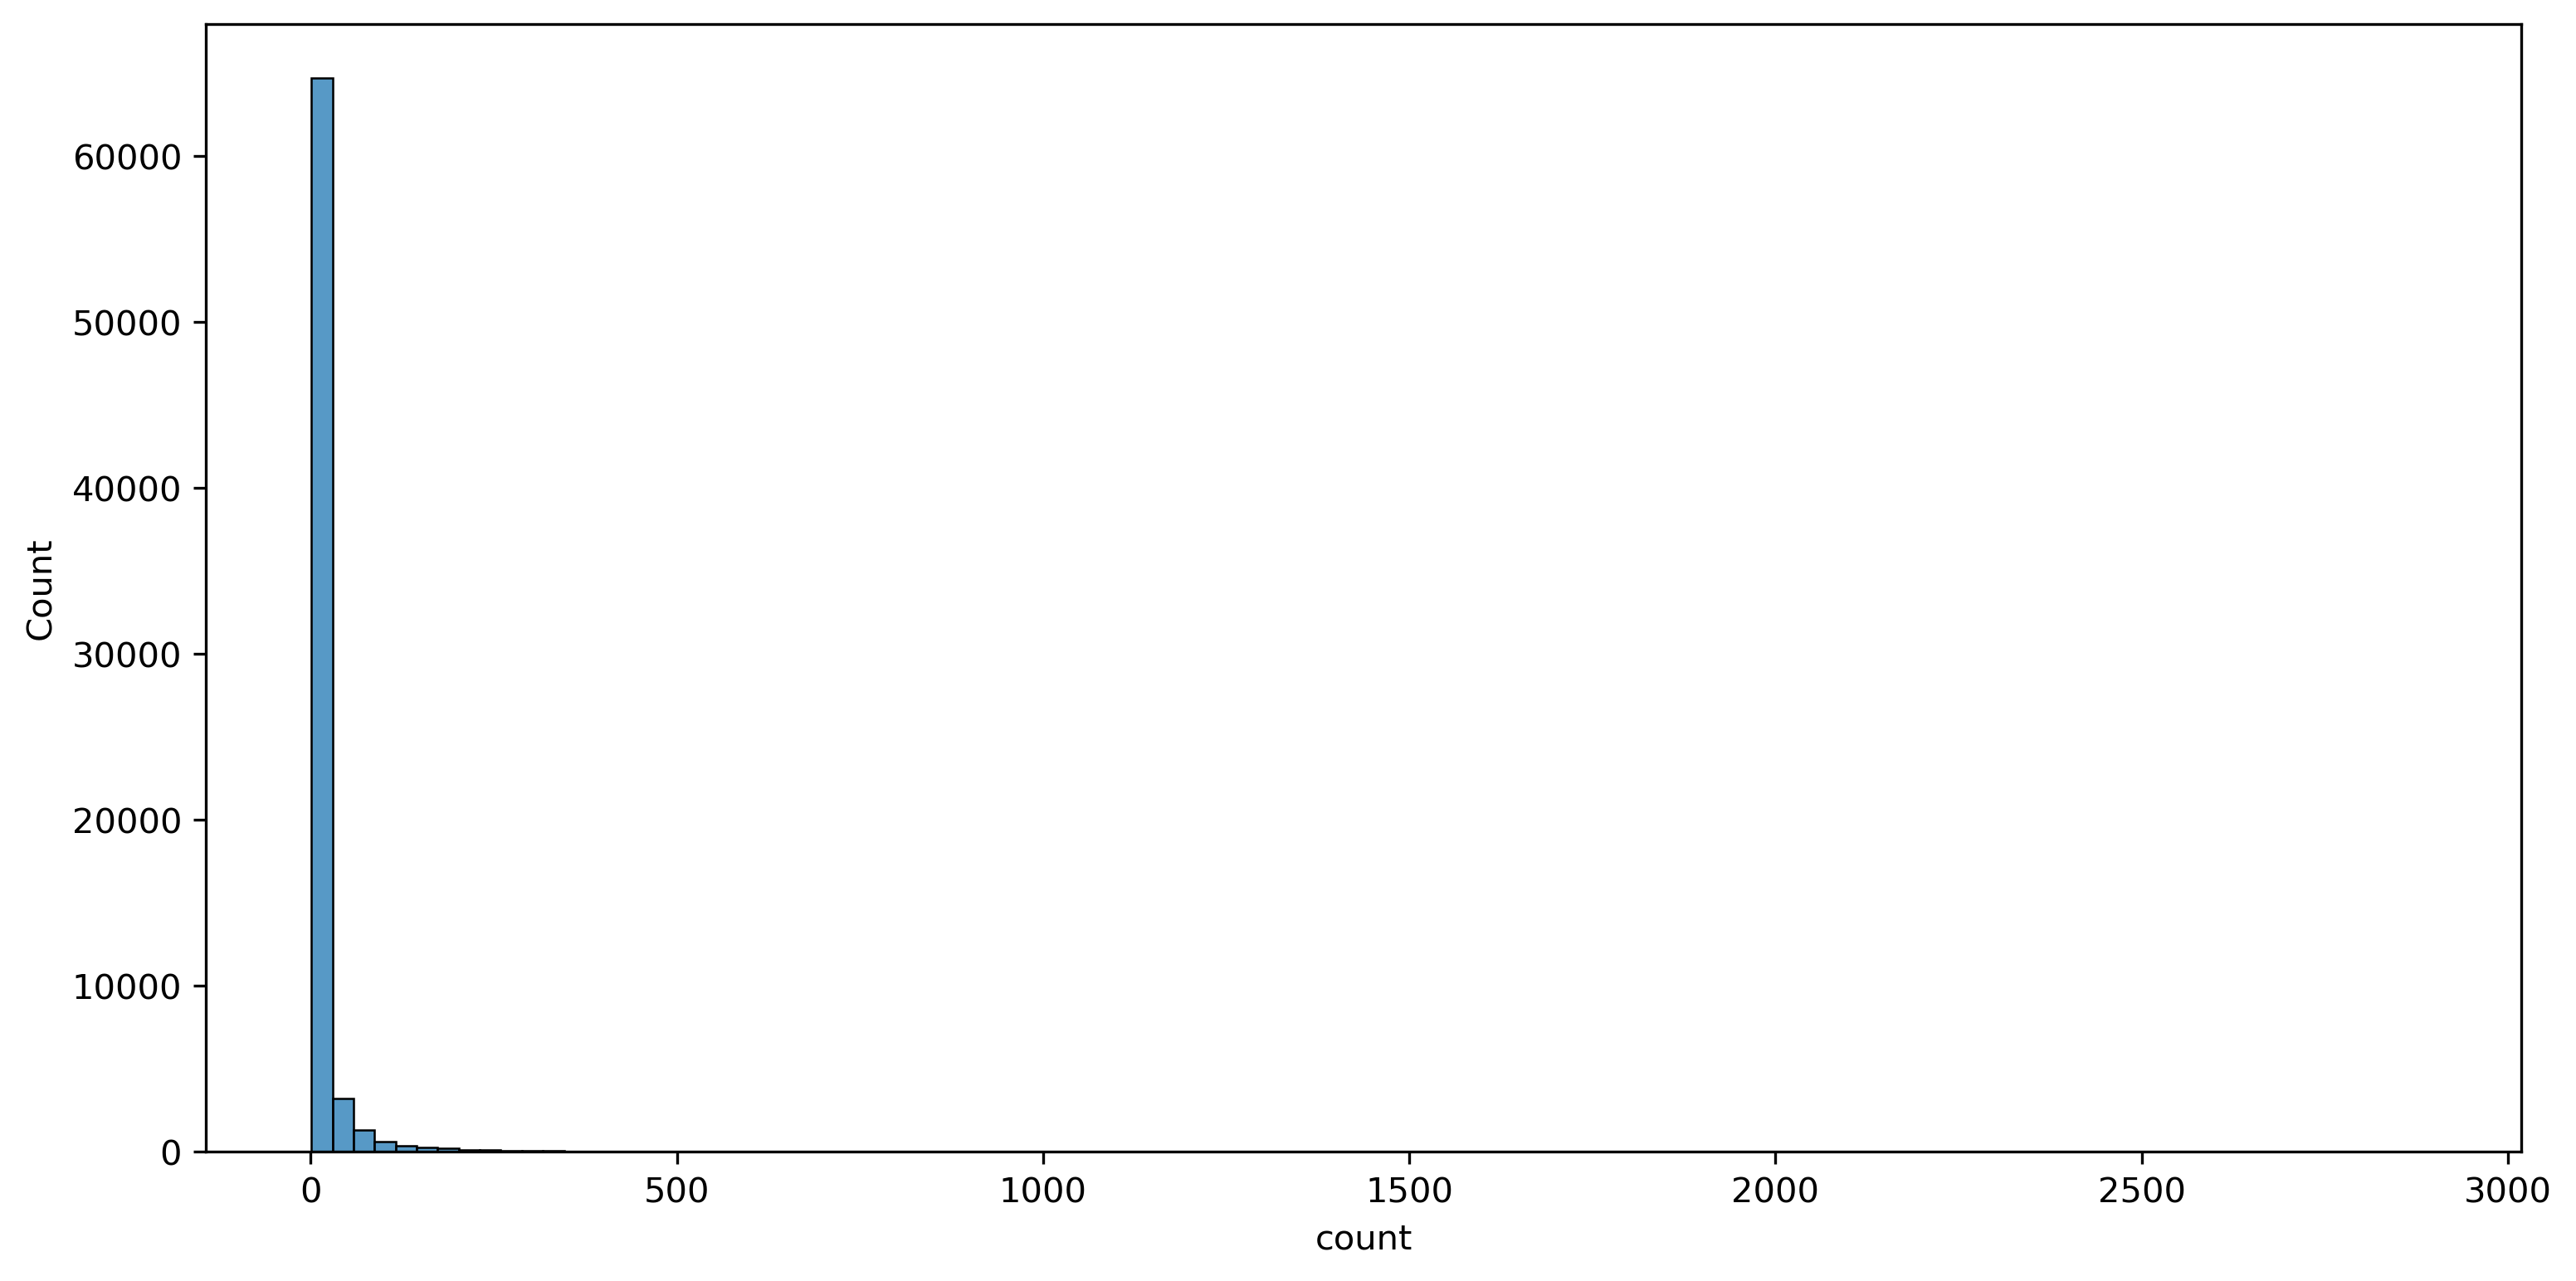

In [94]:
plt.figure(figsize=[12, 6], dpi=300)
sns.histplot(x=movie_count_user_rated['count'], bins=100)
plt.show()

most users done only 2 or 4 ratings.

## If you had a recommender system that only recommends the most popular movies, how good would it be?

In [97]:
top_movies = rating_data[['movie_id', 'user_id']].groupby('movie_id').count().sort_values(by='user_id',
                                                                                          ascending=False).reset_index()
top_movies = top_movies.nlargest(10, 'user_id')['movie_id'].values
top_movies

array([1454468,  816692, 8579674,  993846, 7286456,  770828,  816711,
       1300854, 1670345, 2267998], dtype=int64)

In [101]:
test_users = rating_data.sample(frac=0.1)
test_users = test_users[['user_id', 'movie_id']].groupby(by='user_id')['movie_id'].apply(list).reset_index()
test_users

,user_id,movie_id
0,3,"[6723592, 6199572, 358273]"
1,6,"[5022702, 3040964]"
2,8,"[1454029, 2543164]"
3,9,"[2080374, 1895587, 3532216]"
4,13,[6450804]
...,...,...
24825,71252,[377109]
24826,71254,"[1641975, 2709768, 1396484, 1431045, 758730, 3..."
24827,71255,[2872732]
24828,71257,"[6402468, 2494362, 6149154, 7550000]"


In [102]:
test_users['matching'] = test_users['movie_id'].apply(lambda x: set(x).intersection(top_movies))
test_users

,user_id,movie_id,matching
0,3,"[6723592, 6199572, 358273]",{}
1,6,"[5022702, 3040964]",{}
2,8,"[1454029, 2543164]",{}
3,9,"[2080374, 1895587, 3532216]",{}
4,13,[6450804],{}
...,...,...,...
24825,71252,[377109],{}
24826,71254,"[1641975, 2709768, 1396484, 1431045, 758730, 3...",{}
24827,71255,[2872732],{}
24828,71257,"[6402468, 2494362, 6149154, 7550000]",{}


In [103]:
test_users['correct'] = test_users['matching'].apply(lambda x: len(x))
test_users

,user_id,movie_id,matching,correct
0,3,"[6723592, 6199572, 358273]",{},0
1,6,"[5022702, 3040964]",{},0
2,8,"[1454029, 2543164]",{},0
3,9,"[2080374, 1895587, 3532216]",{},0
4,13,[6450804],{},0
...,...,...,...,...
24825,71252,[377109],{},0
24826,71254,"[1641975, 2709768, 1396484, 1431045, 758730, 3...",{},0
24827,71255,[2872732],{},0
24828,71257,"[6402468, 2494362, 6149154, 7550000]",{},0


In [106]:
print(f"correct guess -> {np.sum(test_users['correct'] > 0)}\n"
      f"wrong guess -> {np.sum(test_users['correct'] == 0)}")

correct guess -> 2432
wrong guess -> 22398


very poor performance!